In [165]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import confusion_matrix
import random
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import keras
from keras.models import load_model 
from keras import optimizers
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Read tsv file as csv
data = pd.read_csv('C:\\Users\\or.hirshman\\Documents\\\learning\\DS_Projects\\similarweb\\DQ_Data_b.tsv', sep='\t')

In [8]:
data.head()

,source,site,% U,V
0,0,06880danwoog.com*,3.343111e-06,36280.0
1,0,0800-horoscope.com*,1.075026e-05,120690.0
2,0,10000boatnames.com*,5.871362e-07,6858.0
3,0,100bestvacations.com*,1.516845e-06,12891.0
4,0,100stuartstreet.com*,1.128228e-06,9758.0


In [9]:
data.info()
# We have 28364 entries, and 4 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28364 entries, 0 to 28363
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28364 non-null  int64  
 1   site    28364 non-null  object 
 2   % U     28364 non-null  float64
 3   V       28364 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 886.5+ KB


In [10]:
data.describe()

,source,% U,V
count,28364.000000,2.836400e+04,2.836400e+04
mean,1.136723,1.278015e-04,1.337023e+06
std,1.021121,3.093624e-03,3.460400e+07
min,0.000000,1.045405e-07,1.020107e+03
25%,0.000000,2.165681e-06,2.085839e+04
50%,1.000000,7.001150e-06,6.868358e+04
75%,2.000000,3.019798e-05,3.009082e+05
max,3.000000,4.345977e-01,4.872713e+09


In [11]:
# Check for Nulls
data.isnull().sum()

#There ane no Nulls for all entries

source    0
site      0
% U       0
V         0
dtype: int64

In [12]:
# How many unique sites are in the dataset?
len(data.site.unique())

9699

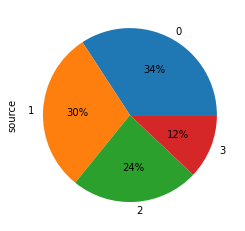

In [13]:
#Pie chart for all source types
data['source'].value_counts().plot(kind='pie', autopct='%1.0f%%')

#More than 1\3 of the data is in the learning set, 30% are in source 1, 24% in source 2, 12% in source 3

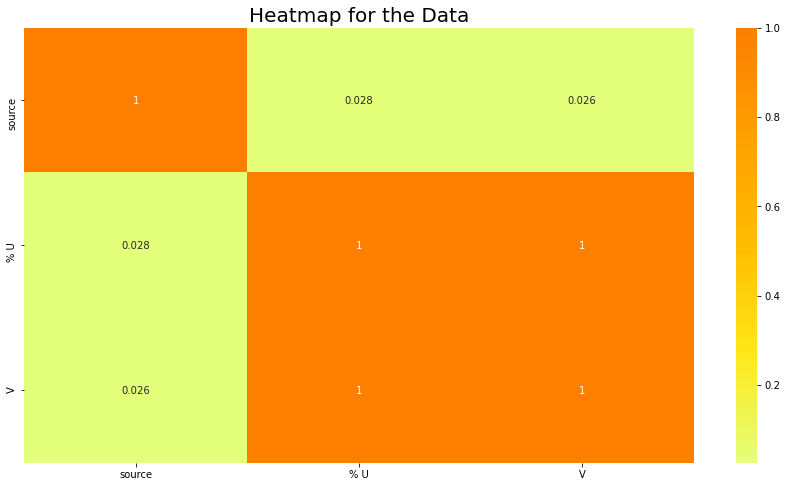

In [14]:
# Heatmap
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [26]:
# Create a separate dataframe for each data source

data0 = data[data['source'] == 0]
data1 = data[data['source'] == 1]
data2 = data[data['source'] == 2]
data3 = data[data['source'] == 3]

In [90]:
display(data0)
display(data1)
display(data2)
display(data3)

# We can see that each dataset does not contain the same sites as the learning set

,source,site,% U,V
0,0,06880danwoog.com*,3.343111e-06,36280.0
1,0,0800-horoscope.com*,1.075026e-05,120690.0
2,0,10000boatnames.com*,5.871362e-07,6858.0
3,0,100bestvacations.com*,1.516845e-06,12891.0
4,0,100stuartstreet.com*,1.128228e-06,9758.0
...,...,...,...,...
9694,0,zurinstitute.com*,3.216422e-06,28788.0
9695,0,zvents.com*,9.387970e-05,740008.0
9696,0,zx6r.com*,4.094824e-06,57444.0
9697,0,zybez.net*,7.628508e-05,1237033.0


,source,site,% U,V
9699,1,06880danwoog.com*,5.064813e-06,7.450894e+04
9700,1,0800-horoscope.com*,7.976695e-06,8.851447e+04
9701,1,10000boatnames.com*,7.662127e-07,7.476707e+03
9702,1,100bestvacations.com*,1.083000e-06,1.056819e+04
9703,1,100stuartstreet.com*,1.919115e-06,1.872674e+04
...,...,...,...,...
18196,1,zurinstitute.com*,4.737790e-06,4.846192e+04
18197,1,zvents.com*,1.431665e-04,1.444088e+06
18198,1,zx6r.com*,4.790944e-06,4.675006e+04
18199,1,zybez.net*,1.081722e-04,1.474000e+06


,source,site,% U,V
18201,2,06880danwoog.com*,8.672000e-06,7.752445e+04
18202,2,0800-horoscope.com*,1.928600e-05,1.724088e+05
18203,2,1015store.com*,4.035164e-05,3.607274e+05
18204,2,101kgb.com*,1.440644e-05,1.287878e+05
18205,2,101science.com*,6.500000e-07,5.810537e+03
...,...,...,...,...
24945,2,ztgd.com*,2.039424e-06,1.823163e+04
24946,2,zvents.com*,8.486724e-05,7.973462e+05
24947,2,zx6r.com*,8.230597e-06,7.357822e+04
24948,2,zybez.net*,1.244973e-04,1.326869e+06


,source,site,% U,V
24950,3,0800-horoscope.com*,8.793715e-06,74442.341462
24951,3,1015store.com*,1.348858e-05,129225.542762
24952,3,101kgb.com*,1.299100e-05,109974.414664
24953,3,101science.com*,8.284027e-07,7012.763234
24954,3,1035kissfm.com*,1.373429e-05,116266.284138
...,...,...,...,...
28359,3,zonebourse.com*,1.156759e-06,11197.604024
28360,3,zoochat.com*,3.372321e-06,28548.056223
28361,3,zvents.com*,8.083042e-05,684262.095167
28362,3,zybez.net*,9.802633e-05,923140.202379


In [33]:
# Describe each dataframe
display(data0.describe())
display(data1.describe())
display(data2.describe())
display(data3.describe())

,source,% U,V
count,9699.0,9.699000e+03,9.699000e+03
mean,0.0,6.249331e-05,6.493156e+05
std,0.0,4.802266e-04,5.558451e+06
min,0.0,2.790000e-07,5.001000e+03
25%,0.0,1.486785e-06,1.424450e+04
50%,0.0,4.236642e-06,4.119500e+04
75%,0.0,1.697491e-05,1.731955e+05
max,0.0,2.085859e-02,2.619745e+08


,source,% U,V
count,8502.0,8.502000e+03,8.502000e+03
mean,1.0,7.291470e-05,8.054732e+05
std,0.0,6.688866e-04,7.577127e+06
min,1.0,1.045405e-07,1.020107e+03
25%,1.0,1.660861e-06,1.715018e+04
50%,1.0,4.944889e-06,5.204454e+04
75%,1.0,1.875423e-05,2.008795e+05
max,1.0,3.308058e-02,3.713884e+08


,source,% U,V
count,6749.0,6.749000e+03,6.749000e+03
mean,2.0,1.779296e-04,1.831009e+06
std,0.0,1.476425e-03,1.643595e+07
min,2.0,3.550000e-07,3.173740e+03
25%,2.0,4.893127e-06,4.531102e+04
50%,2.0,1.532759e-05,1.429922e+05
75%,2.0,5.589029e-05,5.349521e+05
max,2.0,6.195002e-02,6.937006e+08


,source,% U,V
count,3414.0,3.414000e+03,3.414000e+03
mean,3.0,3.509293e-04,3.637961e+06
std,0.0,8.566195e-03,9.580350e+07
min,3.0,2.190000e-07,1.854112e+03
25%,3.0,4.115380e-06,3.595316e+04
50%,3.0,1.758527e-05,1.556398e+05
75%,3.0,7.005734e-05,6.235831e+05
max,3.0,4.345977e-01,4.872713e+09


In [ ]:
# Comparison between learning set and source1:
#It seems that by all paramters (mean, std, min, 25%, 50%, 75%, max) the values of both V and %U in the learning set
# and source1 are quite similar and in the same scale

# Comparison between learning set and source2:
#It seems that for most of the paramters (min, 25%, 75%, max) the values of both V and %U in the learning set
# and source2 are quite similar and in the same scale, for the other parameters (mean, std, 50%) there is
# a difference of *10 for both V and %U 

# Comparison between learning set and source3:
#It seems that for some of the paramters (min, 25%, 75%) the values of both V and %U in the learning set
# and source2 are quite similar and in the same scale, for most of the parameters (mean, std, 50%, max) there is
# a difference of *10 for both V and %U 

In [93]:
# Check if each of the sources (1-3) contains sites which are not in the learning set
arr_data0 = data0['site'].to_numpy()
arr_data1 = data1['site'].to_numpy()
arr_data2 = data2['site'].to_numpy()
arr_data3 = data3['site'].to_numpy()

display(np.setdiff1d(arr_data1, arr_data0))
display(np.setdiff1d(arr_data2, arr_data0))
display(np.setdiff1d(arr_data3, arr_data0))

# The learning set contains all the sites which are in each source (1-3)

array([], dtype=object)

array([], dtype=object)

array([], dtype=object)

In [94]:
# Check if the learning set contains items which are not in the sources (1-3),
# and check if those items are the same for each source

display(np.setdiff1d(arr_data0, arr_data1))
display(np.setdiff1d(arr_data0, arr_data2))
display(np.setdiff1d(arr_data0, arr_data3))

# The learning set contains different elements which are not included in the sources (1-3)
# The items are different for each source

array(['1073thewave.net*', '108.fm*', '17andbaking.com*', ...,
       'zoecarter.com*', 'zoknowsgaming.com*', 'zonebourse.com*'],
      dtype=object)

array(['10000boatnames.com*', '100bestvacations.com*',
       '100stuartstreet.com*', ..., 'zoochat.com*', 'zoomerradio.ca*',
       'zurinstitute.com*'], dtype=object)

array(['06880danwoog.com*', '10000boatnames.com*',
       '100bestvacations.com*', ..., 'ztgd.com*', 'zurinstitute.com*',
       'zx6r.com*'], dtype=object)

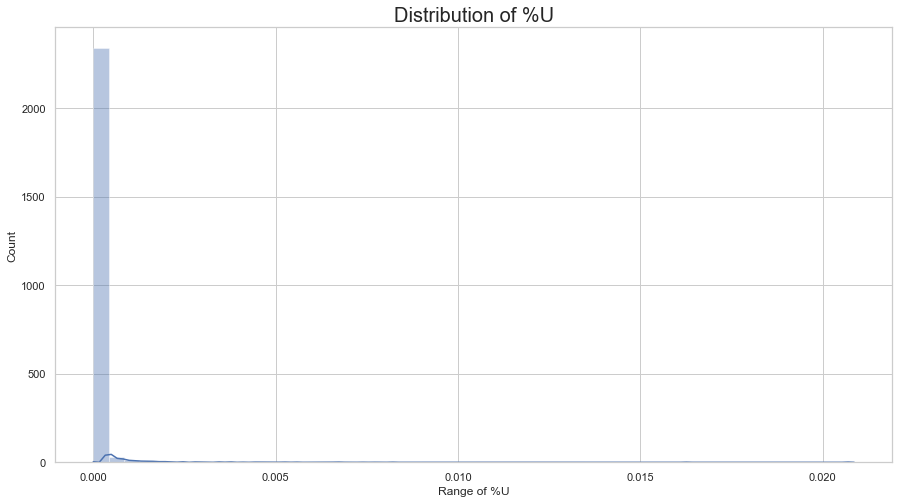

In [37]:
# Learning set % U histogram
plt.subplot(1,1,1)
sns.set(style = 'whitegrid')
sns.distplot(data0['% U'])
plt.title('Distribution of %U', fontsize = 20)
plt.xlabel('Range of %U')
plt.ylabel('Count')
plt.show()


# Most were under 0.001

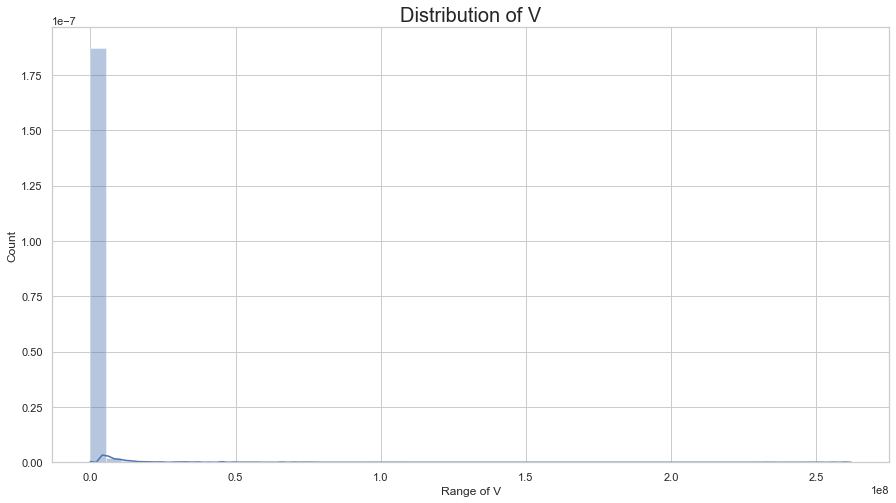

In [41]:
# Learning set V histogram
plt.subplot(1,1,1)
sns.set(style = 'whitegrid')
sns.distplot(data0['V'])
plt.title('Distribution of V', fontsize = 20)
plt.xlabel('Range of V')
plt.ylabel('Count')
plt.show()


# Most were under 0.001

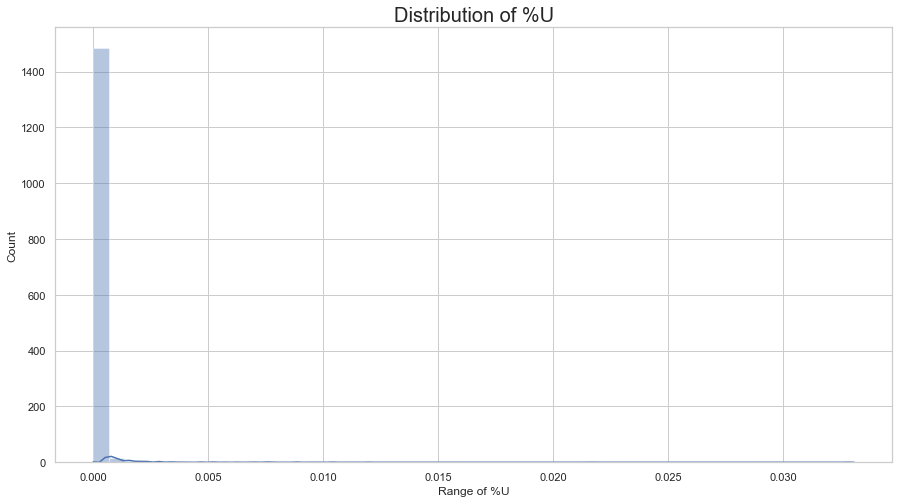

In [38]:
# Source 1 % U histogram
plt.subplot(1,1,1)
sns.set(style = 'whitegrid')
sns.distplot(data1['% U'])
plt.title('Distribution of %U', fontsize = 20)
plt.xlabel('Range of %U')
plt.ylabel('Count')
plt.show()


# Most were under 0.001

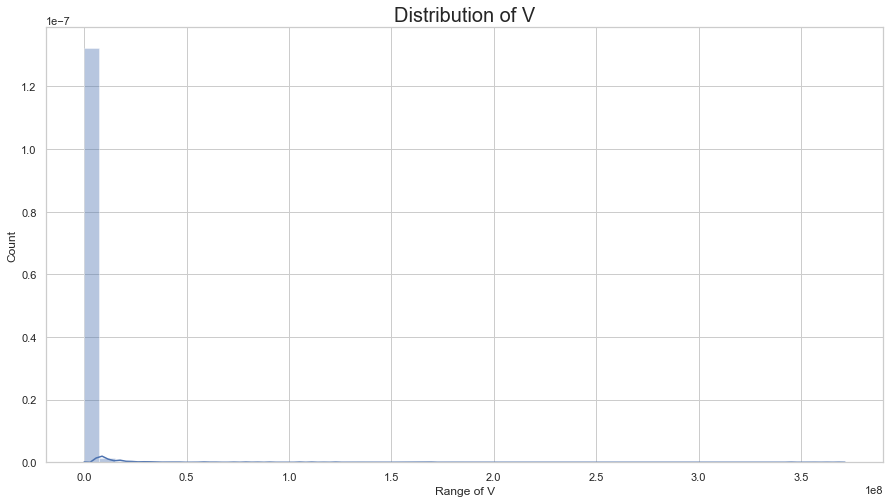

In [44]:
# Source 1 V histogram
plt.subplot(1,1,1)
sns.set(style = 'whitegrid')
sns.distplot(data1['V'])
plt.title('Distribution of V', fontsize = 20)
plt.xlabel('Range of V')
plt.ylabel('Count')
plt.show()


# Most were under 0.001

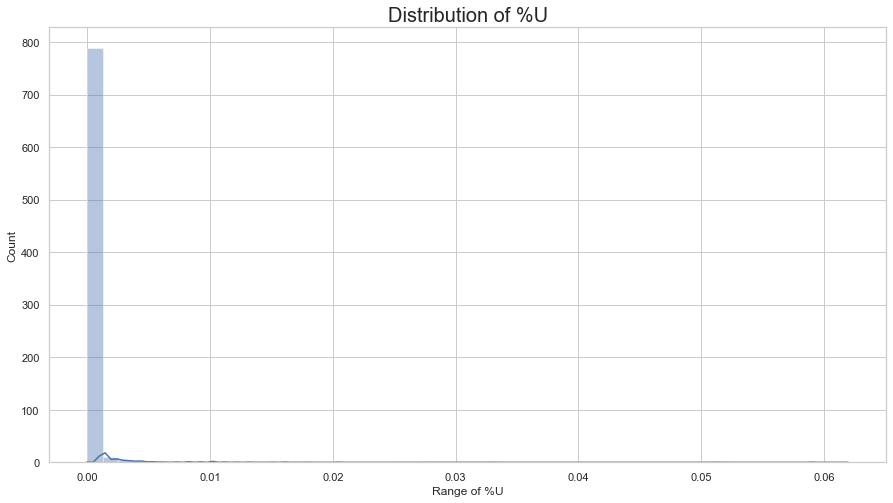

In [39]:
# Source 2 % U histogram
plt.subplot(1,1,1)
sns.set(style = 'whitegrid')
sns.distplot(data2['% U'])
plt.title('Distribution of %U', fontsize = 20)
plt.xlabel('Range of %U')
plt.ylabel('Count')
plt.show()


# Most were under 0.001

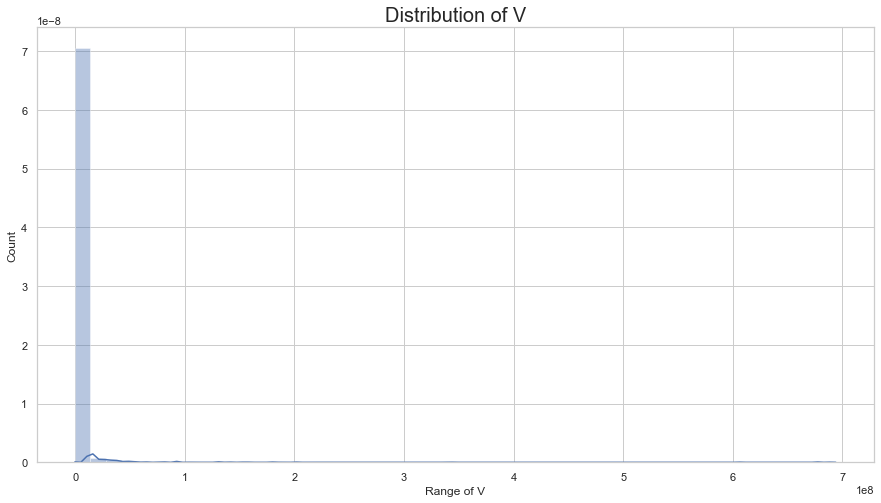

In [43]:
# Sourece 2 V histogram
plt.subplot(1,1,1)
sns.set(style = 'whitegrid')
sns.distplot(data2['V'])
plt.title('Distribution of V', fontsize = 20)
plt.xlabel('Range of V')
plt.ylabel('Count')
plt.show()


# Most were under 0.001

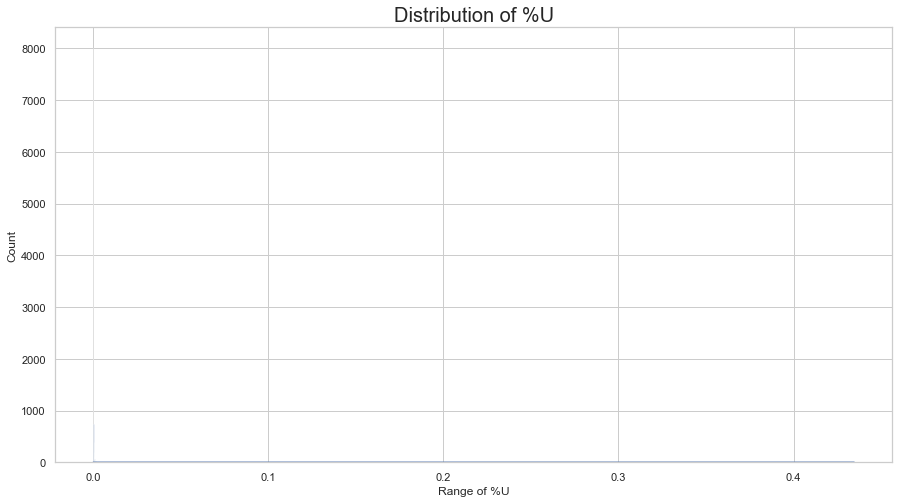

In [86]:
# Source 3 % U histogram
plt.subplot(1,1,1)
sns.set(style = 'whitegrid')
sns.distplot(data3['% U'], np.arange(0, 0.01, 0.0001))
plt.title('Distribution of %U', fontsize = 20)
plt.xlabel('Range of %U')
plt.ylabel('Count')
plt.show()


# Most were under 0.001

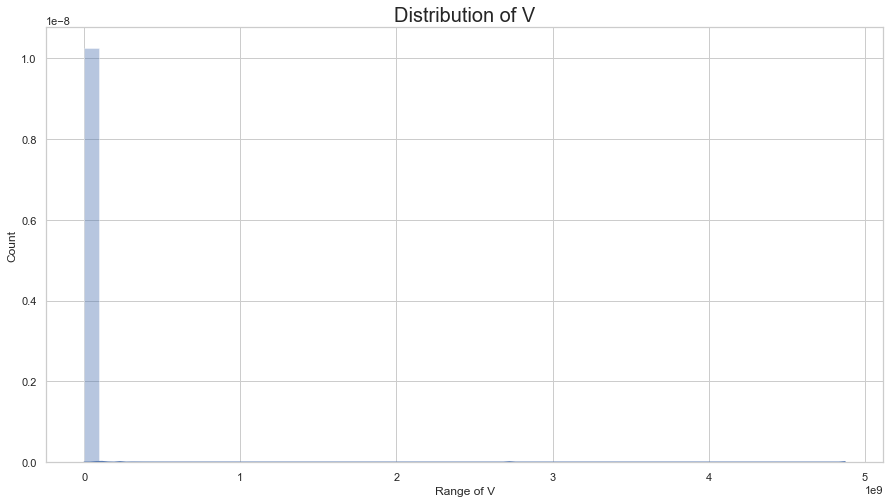

In [42]:
#  Source 3 V histogram
plt.subplot(1,1,1)
sns.set(style = 'whitegrid')
sns.distplot(data3['V'])
plt.title('Distribution of V', fontsize = 20)
plt.xlabel('Range of V')
plt.ylabel('Count')
plt.show()


# Most were under 0.001

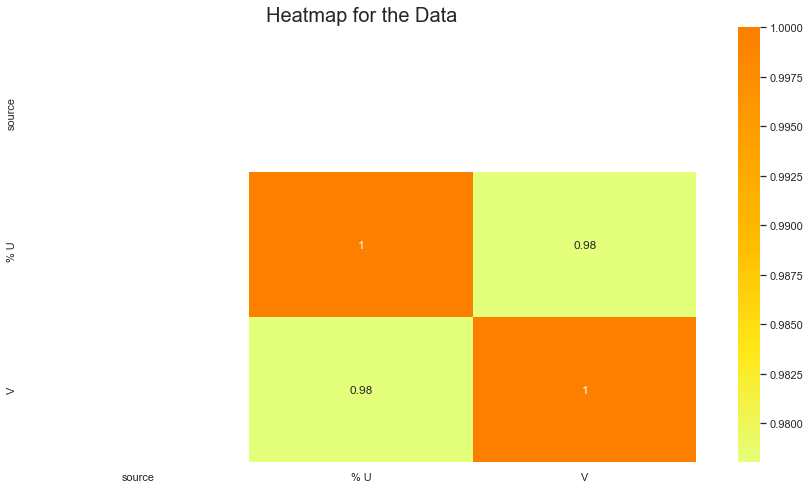

In [51]:
# Heatmap for learning set
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data0.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

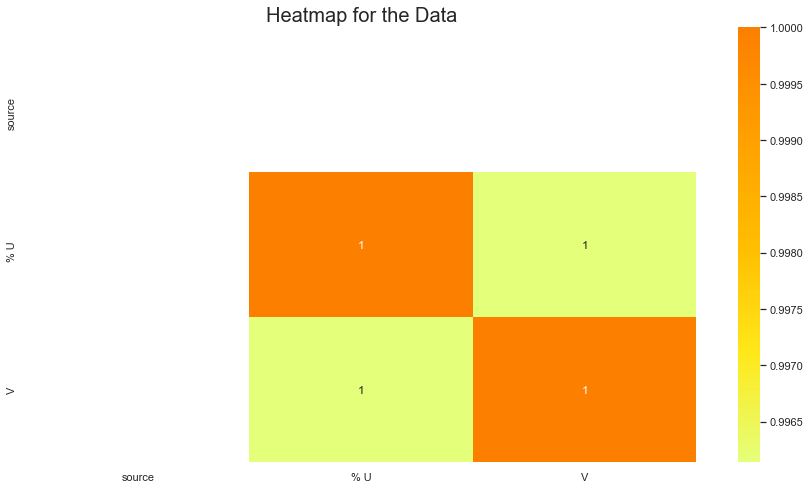

In [47]:
# Heatmap for sourece 1
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data1.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

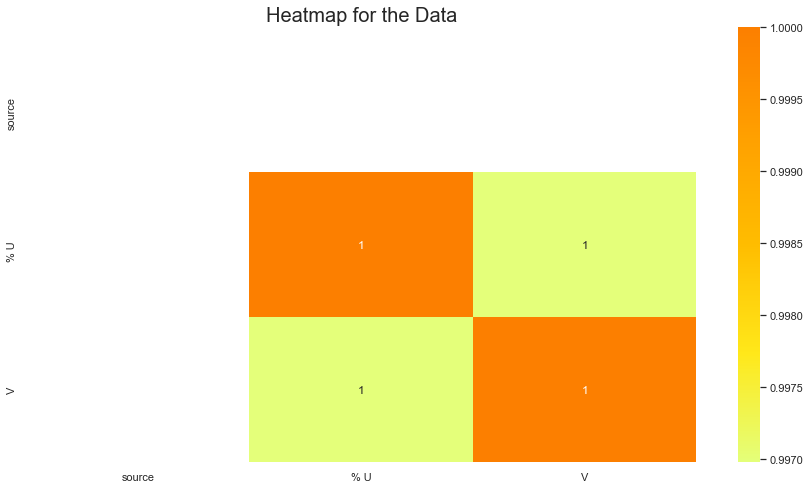

In [48]:
# Heatmap for source 2
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data2.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

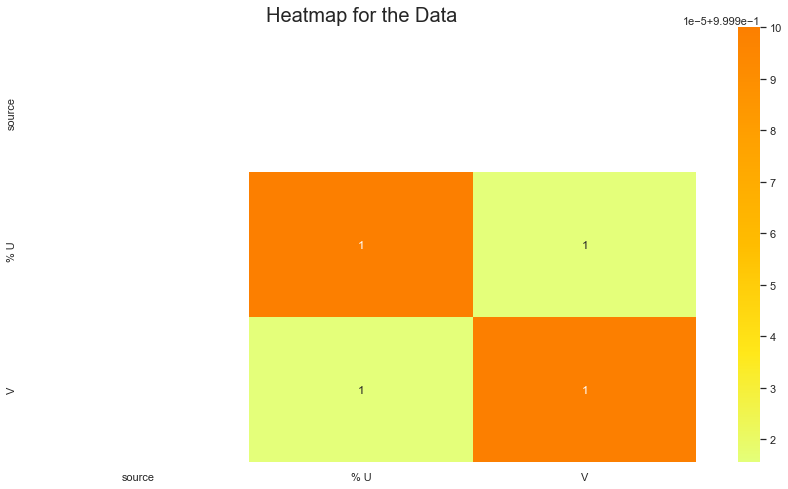

In [49]:
# Heatmap for source 3
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data3.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [ ]:
# We can see that in the learning set the correlation between V and %U is 98%, and in all the three sources the correlation is 1.

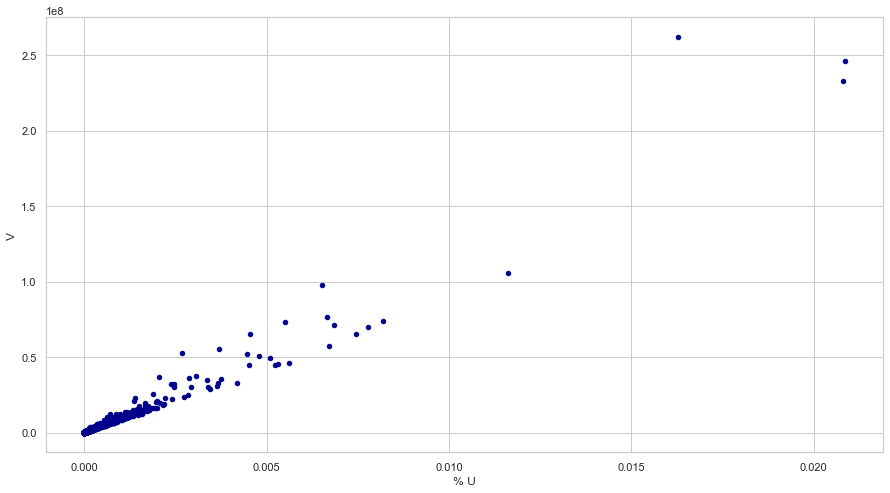

In [52]:
# Scatter plot of % U and V for the learning set
data0.plot.scatter(x='% U', y='V', c='DarkBlue')

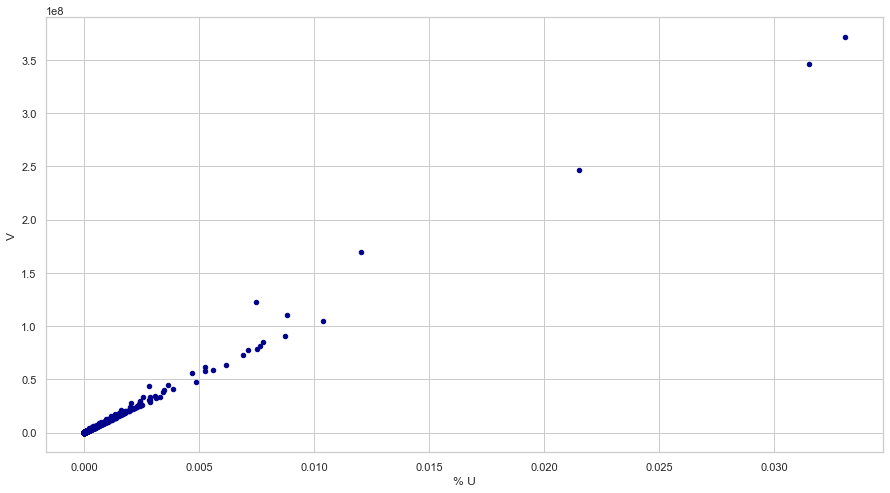

In [53]:
# Scatter plot of % U and V for source 1
data1.plot.scatter(x='% U', y='V', c='DarkBlue')

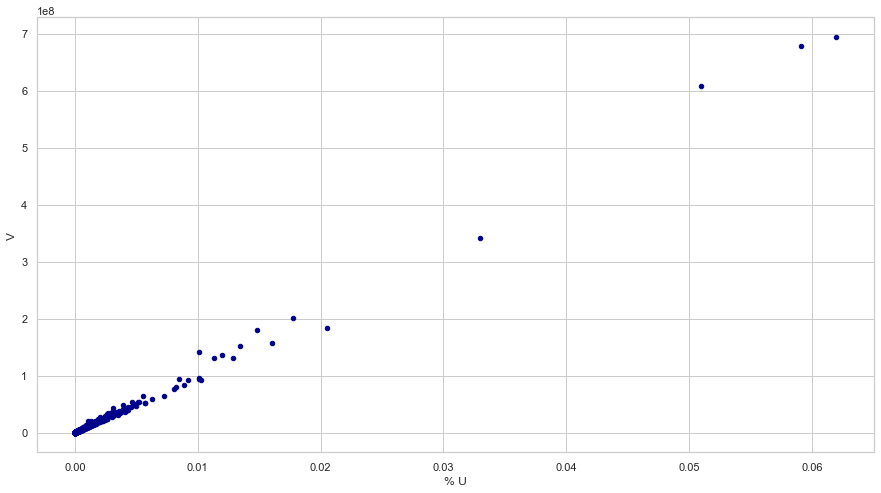

In [54]:
# Scatter plot of % U and V for source 2
data2.plot.scatter(x='% U', y='V', c='DarkBlue')

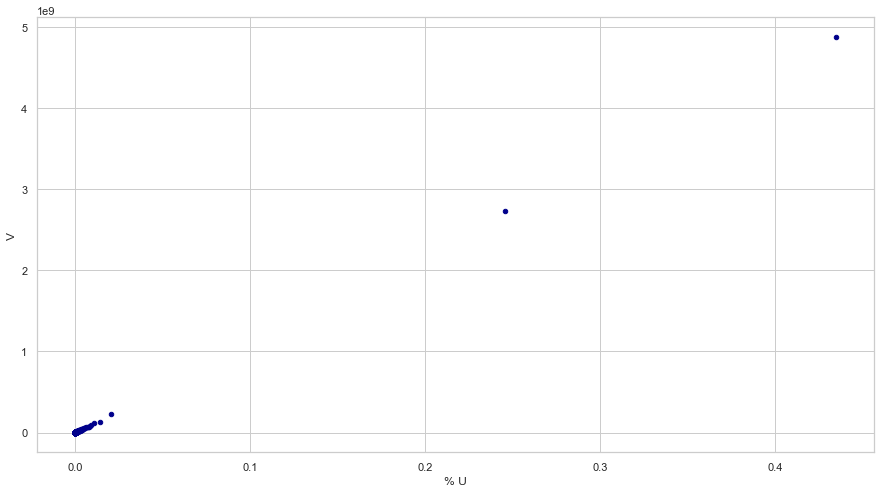

In [55]:
# Scatter plot of % U and V for source 3
data3.plot.scatter(x='% U', y='V', c='DarkBlue')

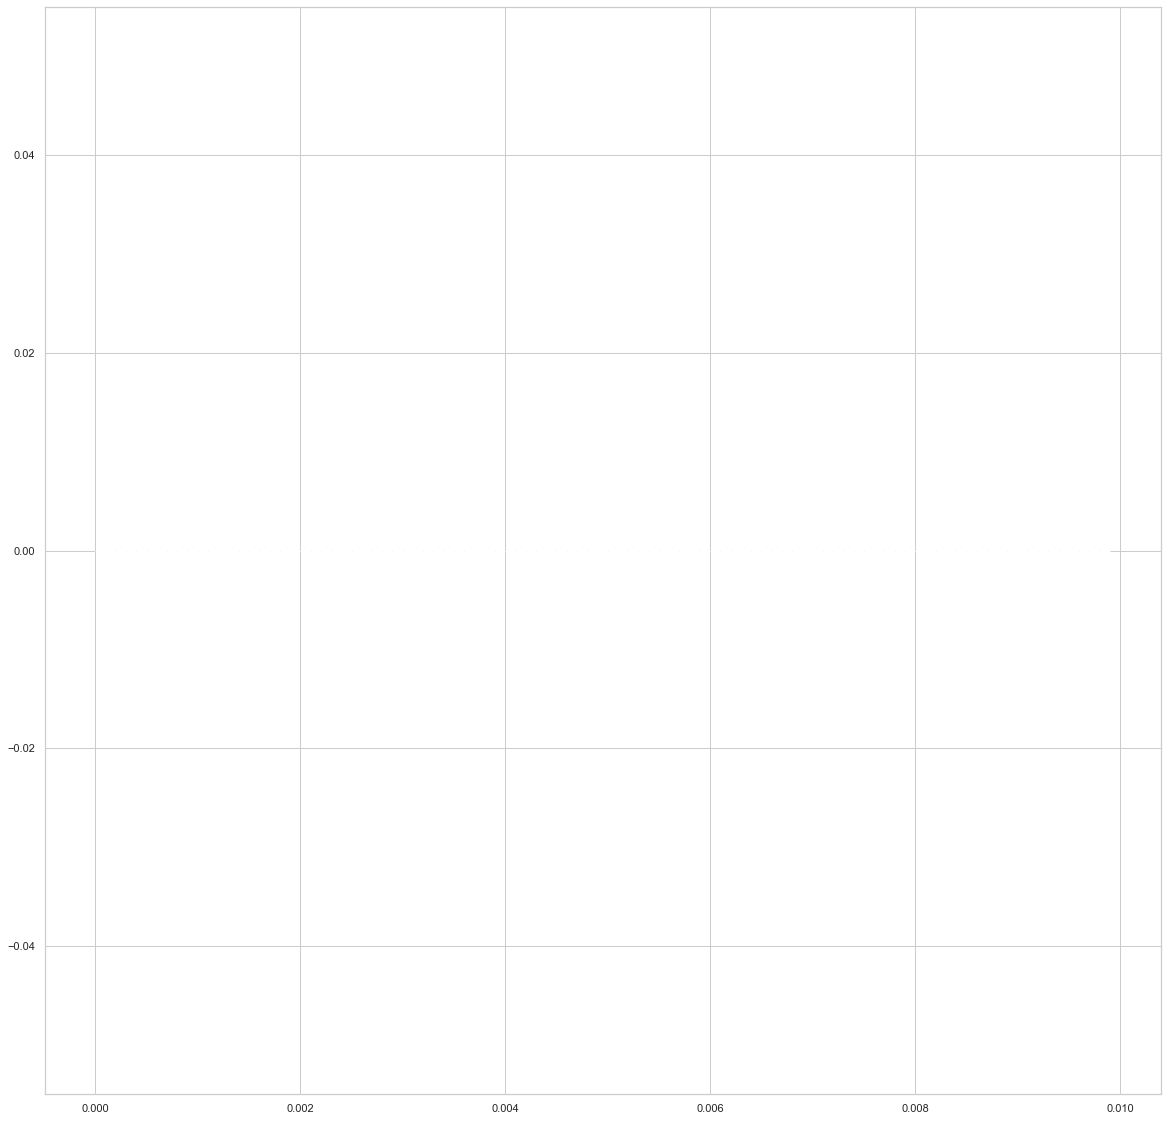

In [83]:
fig, axs = plt.subplots(1, 1, figsize=(20,20))
hist = axs.hist(data0['V'].to_numpy(), np.arange(0, 0.01, 0.0001)) #numpy to create bins over range
plt.show()

In [87]:
# Create dataframes from the learning set which contain only the sites which are in the compared source

data0_for1 = data0.loc[data0['site'].isin(data1['site'])]
data0_for2 = data0.loc[data0['site'].isin(data2['site'])]
data0_for3 = data0.loc[data0['site'].isin(data3['site'])]

In [132]:
# Display datasets

display(data0_for1)
display(data0_for2)
display(data0_for3)

# Verified that each df contains same sites as data1-3 and different V, %U (but the same as data0)

,source,site,% U,V
0,0,06880danwoog.com*,3.343111e-06,36280.0
1,0,0800-horoscope.com*,1.075026e-05,120690.0
2,0,10000boatnames.com*,5.871362e-07,6858.0
3,0,100bestvacations.com*,1.516845e-06,12891.0
4,0,100stuartstreet.com*,1.128228e-06,9758.0
...,...,...,...,...
9694,0,zurinstitute.com*,3.216422e-06,28788.0
9695,0,zvents.com*,9.387970e-05,740008.0
9696,0,zx6r.com*,4.094824e-06,57444.0
9697,0,zybez.net*,7.628508e-05,1237033.0


,source,site,% U,V
0,0,06880danwoog.com*,3.343111e-06,36280.0
1,0,0800-horoscope.com*,1.075026e-05,120690.0
6,0,1015store.com*,2.282332e-05,285488.0
7,0,101kgb.com*,9.015297e-06,76934.0
8,0,101science.com*,7.080000e-07,6502.0
...,...,...,...,...
9693,0,ztgd.com*,7.076418e-07,6144.0
9695,0,zvents.com*,9.387970e-05,740008.0
9696,0,zx6r.com*,4.094824e-06,57444.0
9697,0,zybez.net*,7.628508e-05,1237033.0


,source,site,% U,V
1,0,0800-horoscope.com*,1.075026e-05,120690.0
6,0,1015store.com*,2.282332e-05,285488.0
7,0,101kgb.com*,9.015297e-06,76934.0
8,0,101science.com*,7.080000e-07,6502.0
12,0,1035kissfm.com*,1.838593e-05,156960.0
...,...,...,...,...
9688,0,zonebourse.com*,9.435225e-07,7562.0
9689,0,zoochat.com*,2.586136e-06,32034.0
9695,0,zvents.com*,9.387970e-05,740008.0
9697,0,zybez.net*,7.628508e-05,1237033.0


In [ ]:
# Calculate metics:

In [115]:
# Difference between 'V' average
# Calculate for each source (1-3) the absulote value of the difference in 'V' mean between the learning set and the source

dif_avg_V_1 = abs(data0_for1['V'].mean() - data1['V'].mean())
dif_avg_V_2 = abs(data0_for2['V'].mean() - data2['V'].mean())
dif_avg_V_3 = abs(data0_for3['V'].mean() - data3['V'].mean())

display(dif_avg_V_1)
display(dif_avg_V_2)
display(dif_avg_V_3)

# Source 1 is the closests, then source 2 and then source 3

73448.75610726222

925200.6362900218

1972271.822261787

In [116]:
# Difference between '% U' average
# Calculate for each source (1-3) the absulote value of the difference in '% U' mean between the learning set and the source

dif_avg_U_1 = abs(data0_for1['% U'].mean() - data1['% U'].mean())
dif_avg_U_2 = abs(data0_for2['% U'].mean() - data2['% U'].mean())
dif_avg_U_3 = abs(data0_for3['% U'].mean() - data3['% U'].mean())

display(dif_avg_U_1)
display(dif_avg_U_2)
display(dif_avg_U_3)

# Source 1 is the closests, then source 2 and then source 3

2.420712881578239e-06

9.077667315628665e-05

0.00019037837290420952

In [121]:
# Difference between 'V' + % U' average
# Calculate for each source (1-3) the absulote value of the difference in '% U' mean between the learning set and the source

dif_avg_VplusU_1 = abs((data0_for1['V'] + data0_for1['% U']).mean() - (data1['V'] + data1['% U']).mean())
dif_avg_VplusU_2 = abs((data0_for2['V'] + data0_for2['% U']).mean() - (data2['V'] + data2['% U']).mean())
dif_avg_VplusU_3 = abs((data0_for3['V'] + data0_for3['% U']).mean() - (data3['V'] + data3['% U']).mean())

display(dif_avg_VplusU_1)
display(dif_avg_VplusU_2)
display(dif_avg_VplusU_3)

# Source 1 is the closests, then source 2 and then source 3

73448.75610968284

925200.6363807963

1972271.822452159

In [122]:
# Difference between 'V' * % U' average
# Calculate for each source (1-3) the absulote value of the difference in '% U' mean between the learning set and the source

dif_avg_VmulU_1 = abs((data0_for1['V'] * data0_for1['% U']).mean() - (data1['V'] * data1['% U']).mean())
dif_avg_VmulU_2 = abs((data0_for2['V'] * data0_for2['% U']).mean() - (data2['V'] * data2['% U']).mean())
dif_avg_VmulU_3 = abs((data0_for3['V'] * data0_for3['% U']).mean() - (data3['V'] * data3['% U']).mean())

display(dif_avg_VmulU_1)
display(dif_avg_VmulU_2)
display(dif_avg_VmulU_3)

# Source 1 is the closests, then source 2 and then source 3

2092.0395656593046

20720.82334546019

814166.526932614

In [123]:
# Difference between 'V' median
# Calculate for each source (1-3) the absulote value of the difference in 'V' median between the learning set and the source

dif_median_V_1 = abs(data0_for1['V'].median() - data1['V'].median())
dif_median_V_2 = abs(data0_for2['V'].median() - data2['V'].median())
dif_median_V_3 = abs(data0_for3['V'].median() - data3['V'].median())

display(dif_median_V_1)
display(dif_median_V_2)
display(dif_median_V_3)

# Source 1 is the closests, then source 2 and then source 3

418.95636799045315

64617.17701863899

36417.73843795952

In [124]:
# Difference between '%U' median
# Calculate for each source (1-3) the absulote value of the difference in 'V' median between the learning set and the source

dif_median_U_1 = abs(data0_for1['% U'].median() - data1['% U'].median())
dif_median_U_2 = abs(data0_for2['% U'].median() - data2['% U'].median())
dif_median_U_3 = abs(data0_for3['% U'].median() - data3['% U'].median())

display(dif_median_U_1)
display(dif_median_U_2)
display(dif_median_U_3)

# Source 1 is the closests, then source 2 and then source 3

4.462013412404902e-07

7.387768757546161e-06

1.2603166298850526e-06

In [125]:
# Difference between 'V' + % U' median
# Calculate for each source (1-3) the absulote value of the difference in '% U' median between the learning set and the source

dif_median_VplusU_1 = abs((data0_for1['V'] + data0_for1['% U']).median() - (data1['V'] + data1['% U']).median())
dif_median_VplusU_2 = abs((data0_for2['V'] + data0_for2['% U']).median() - (data2['V'] + data2['% U']).median())
dif_median_VplusU_3 = abs((data0_for3['V'] + data0_for3['% U']).median() - (data3['V'] + data3['% U']).median())

display(dif_median_VplusU_1)
display(dif_median_VplusU_2)
display(dif_median_VplusU_3)

# Different result-
# Source 1 is the closests, then source 3 and then source 2

418.95636789705895

64617.17702590363

36417.7384413722

In [126]:
# Difference between 'V' * % U' median
# Calculate for each source (1-3) the absulote value of the difference in '% U' median between the learning set and the source

dif_median_VmulU_1 = abs((data0_for1['V'] * data0_for1['% U']).median() - (data1['V'] * data1['% U']).median())
dif_median_VmulU_2 = abs((data0_for2['V'] * data0_for2['% U']).median() - (data2['V'] * data2['% U']).median())
dif_median_VmulU_3 = abs((data0_for3['V'] * data0_for3['% U']).median() - (data3['V'] * data3['% U']).median())

display(dif_median_VmulU_1)
display(dif_median_VmulU_2)
display(dif_median_VmulU_3)

# Different result-
# Source 1 is the closests, then source 3 and then source 2

0.026807071011930583

1.5579204200814116

0.8416219753024361

In [127]:
# Difference between 'V' std
# Calculate for each source (1-3) the absulote value of the difference in 'V' std between the learning set and the source

dif_std_V_1 = abs(data0_for1['V'].std() - data1['V'].std())
dif_std_V_2 = abs(data0_for2['V'].std() - data2['V'].std())
dif_std_V_3 = abs(data0_for3['V'].std() - data3['V'].std())

display(dif_std_V_1)
display(dif_std_V_2)
display(dif_std_V_3)

# Source 1 is the closests, then source 2 and then source 3

1655504.0769965108

9802798.606539484

86557180.36979736

In [128]:
# Difference between '% U' std
# Calculate for each source (1-3) the absulote value of the difference in '% U' std between the learning set and the source

dif_std_U_1 = abs(data0_for1['% U'].std() - data1['% U'].std())
dif_std_U_2 = abs(data0_for2['% U'].std() - data2['% U'].std())
dif_std_U_3 = abs(data0_for3['% U'].std() - data3['% U'].std())

display(dif_std_U_1)
display(dif_std_U_2)
display(dif_std_U_3)

# Source 1 is the closests, then source 2 and then source 3

0.00015716506787041406

0.0009035546605683984

0.0077689620403086565

In [129]:
# Difference between 'V' + % U' std
# Calculate for each source (1-3) the absulote value of the difference in '% U' std between the learning set and the source

dif_std_VplusU_1 = abs((data0_for1['V'] + data0_for1['% U']).std() - (data1['V'] + data1['% U']).std())
dif_std_VplusU_2 = abs((data0_for2['V'] + data0_for2['% U']).std() - (data2['V'] + data2['% U']).std())
dif_std_VplusU_3 = abs((data0_for3['V'] + data0_for3['% U']).std() - (data3['V'] + data3['% U']).std())

display(dif_std_VplusU_1)
display(dif_std_VplusU_2)
display(dif_std_VplusU_3)

# Different result-
# Source 1 is the closests, then source 3 and then source 2

1655504.0771623682

9802798.6074512

86557180.37758331

In [130]:
# Difference between 'V' * % U' std
# Calculate for each source (1-3) the absulote value of the difference in '% U' mean between the learning set and the source

dif_std_VmulU_1 = abs((data0_for1['V'] * data0_for1['% U']).std() - (data1['V'] * data1['% U']).std())
dif_std_VmulU_2 = abs((data0_for2['V'] * data0_for2['% U']).std() - (data2['V'] * data2['% U']).std())
dif_std_VmulU_3 = abs((data0_for3['V'] * data0_for3['% U']).std() - (data3['V'] * data3['% U']).std())

display(dif_std_VmulU_1)
display(dif_std_VmulU_2)
display(dif_std_VmulU_3)

# Source 1 is the closests, then source 2 and then source 3

98209.28580637735

721815.0913557182

37865459.92777424

In [162]:
# Euclidian distance for rows

# calculate the Euclidean distance between two vectors
def euclidean_distance(vec1, vec2):
    distance = 0.0
    for i in range(len(vec1)):
        distance += (vec1[i] - vec2[i])**2
    return math.sqrt(distance)

In [163]:
# Euclidian distance for dataframes

def euclidean_distance_dataframes(df1, df2):
    distances = [] 
    for index1, row1 in df1.iterrows():
        for index2, row2 in df2.iterrows():
            distance = euclidean_distance(row1, row2)
            distances.append(distance)
    return distances

In [156]:
# Create dataframes from learning sets with the columns: 'V', '% U' only

data01_U_V = data0_for1[['V', '% U']].copy()
data02_U_V = data0_for2[['V', '% U']].copy()
data03_U_V = data0_for3[['V', '% U']].copy()

In [157]:
display(data0_for1.head(3))
display(data01_U_V.head(3))

display(data0_for2.head(3))
display(data02_U_V.head(3))

display(data0_for3.head(3))
display(data03_U_V.head(3))

,source,site,% U,V
0,0,06880danwoog.com*,3.343111e-06,36280.0
1,0,0800-horoscope.com*,1.075026e-05,120690.0
2,0,10000boatnames.com*,5.871362e-07,6858.0


,V,% U
0,36280.0,3.343111e-06
1,120690.0,1.075026e-05
2,6858.0,5.871362e-07


,source,site,% U,V
0,0,06880danwoog.com*,0.000003,36280.0
1,0,0800-horoscope.com*,0.000011,120690.0
6,0,1015store.com*,0.000023,285488.0


,V,% U
0,36280.0,0.000003
1,120690.0,0.000011
6,285488.0,0.000023


,source,site,% U,V
1,0,0800-horoscope.com*,0.000011,120690.0
6,0,1015store.com*,0.000023,285488.0
7,0,101kgb.com*,0.000009,76934.0


,V,% U
1,120690.0,0.000011
6,285488.0,0.000023
7,76934.0,0.000009


In [158]:
# Create dataframes from sources sets with the columns: 'V', '% U' only

data1_U_V = data1[['V', '% U']].copy()
data2_U_V = data2[['V', '% U']].copy()
data3_U_V = data3[['V', '% U']].copy()

In [159]:
display(data1.head(3))
display(data1_U_V.head(3))

display(data2.head(3))
display(data2_U_V.head(3))

display(data3.head(3))
display(data3_U_V.head(3))

,source,site,% U,V
9699,1,06880danwoog.com*,5.064813e-06,74508.941669
9700,1,0800-horoscope.com*,7.976695e-06,88514.470580
9701,1,10000boatnames.com*,7.662127e-07,7476.707418


,V,% U
9699,74508.941669,5.064813e-06
9700,88514.470580,7.976695e-06
9701,7476.707418,7.662127e-07


,source,site,% U,V
18201,2,06880danwoog.com*,0.000009,77524.450603
18202,2,0800-horoscope.com*,0.000019,172408.795295
18203,2,1015store.com*,0.000040,360727.354321


,V,% U
18201,77524.450603,0.000009
18202,172408.795295,0.000019
18203,360727.354321,0.000040


,source,site,% U,V
24950,3,0800-horoscope.com*,0.000009,74442.341462
24951,3,1015store.com*,0.000013,129225.542762
24952,3,101kgb.com*,0.000013,109974.414664


,V,% U
24950,74442.341462,0.000009
24951,129225.542762,0.000013
24952,109974.414664,0.000013


In [166]:
# Calculate euclidian distances between 0 and 1, 0 and 2, 0 and 3

euclidian_dist_1 = euclidean_distance_dataframes(data01_U_V, data1_U_V)
euclidian_dist_2 = euclidean_distance_dataframes(data02_U_V, data2_U_V)
euclidian_dist_3 = euclidean_distance_dataframes(data03_U_V, data3_U_V)

[38228.94166928361,
 52234.4705800152,
 28803.2925817362,
 25711.8125817362,
 17553.2646313418,
 88882.46593611401,
 277164.97107692,
 108705.76691998198,
 28837.9535352982,
 11310.337627006098,
 74.17532571720221,
 13298.971930912696,
 65197.894418656,
 22487.254926719397,
 2273.7192784668005,
 11946.713872979999,
 154845.04256930397,
 20738.101177001,
 165218.110073327,
 230148.56521124498,
 12636.412103720399,
 18977.7405423178,
 33528.496328242996,
 21328.6135971478,
 4456.837885208799,
 2722.028599774603,
 9259.3084101079,
 26809.293748846598,
 17190.0167689926,
 5856.731718902702,
 31958.5058218715,
 291327.36565201,
 27165.7872168358,
 1746.0937031192007,
 438119.298838833,
 5081.075754459598,
 30737.016349088706,
 7618.412085682099,
 31792.985794814,
 150190.48432579899,
 64672.96840886801,
 14157.739821291507,
 75811.22997549301,
 24691.4414430666,
 24158.8057456871,
 29146.6448703495,
 492742.139633961,
 94558.63839458801,
 6888163.17952457,
 1937645.5672198997,
 27803.159413

[41244.4506031888,
 136128.79529485598,
 324447.354321132,
 92507.795941612,
 30469.4632355715,
 160962.312941388,
 217824.840402873,
 4671.319527060201,
 4976.605760161801,
 152428.056344037,
 86524.528733887,
 18797.7108825512,
 34348.2177857459,
 14141.145320229807,
 43430.3624073657,
 8954.649243206797,
 415350.689595685,
 98362.14333348302,
 543608.646813382,
 163581.96783337,
 765.7872661127985,
 18556.877094093998,
 773034.524684889,
 189803.59097469397,
 663501.257820162,
 23281.4390550191,
 879170.509669883,
 222242.70209835802,
 17031433.9246687,
 5679326.3890817,
 11789.553483943397,
 606788.480535218,
 1046286.7745340599,
 16485.292539860802,
 207768.70148368,
 19090.1031888615,
 11058.946705591898,
 97946.56098091099,
 516809.01088232,
 15963.309589041102,
 196882.88205676,
 31361.200197619604,
 7754257.80101189,
 27304.6405245901,
 47828607.8739769,
 124533.265812709,
 69101.87177782401,
 17595955.638918202,
 145295.06241365397,
 431671.85213952896,
 6327.908276398601,
 1

[46247.65853796969,
 8535.542762161,
 10715.585335773008,
 113677.2367657822,
 4423.7158620769915,
 110855.9742323879,
 79864.36725960602,
 64456.865460658795,
 79568.49187259839,
 117514.9720972095,
 4261.652333028003,
 4242.685395013003,
 106938.1376143643,
 76089.782925206,
 36237.58601212199,
 115860.6491623971,
 652200.9831107041,
 27984.59971797859,
 4673082.78577625,
 1231646.46703476,
 481217.296829371,
 12793.679983228998,
 64498.359987420095,
 2352827.55673575,
 7240236.15688172,
 176734.30962525896,
 64538.7034166516,
 6663726.41580462,
 150927.80202378798,
 139912.68255972897,
 530562.814353154,
 257431.90598604706,
 155380.66957548,
 2173025.49636325,
 679397.752170307,
 10940.085102926998,
 60315.5145564634,
 18778.241729643007,
 31276.609466377107,
 5794.645734674996,
 1749425.31088518,
 99540.14426761211,
 878990.058049405,
 1385107.02658119,
 151843.48362625804,
 467635.82717017294,
 59330.650512351014,
 55296.6148531567,
 113823.1953979872,
 61873.378849267,
 463748.6

In [167]:
display(np.mean(euclidian_dist_1))
display(np.mean(euclidian_dist_2))
display(np.mean(euclidian_dist_3))

# Source 1 is the closests, then source 2 and then source 3

1389961.6837806322

2461777.8833220527

4878481.318012763

In [ ]:
# Calculate Euclidian distance between datasets

euclidian_distance_1 = euclidean_distance(vec1, vec2)
euclidian_distance_2 = euclidean_distance(vec1, vec2)
euclidian_distance_3 = euclidean_distance(vec1, vec2)

In [100]:
data1['V'].mean()

805473.2164695299

In [101]:
data0['V'].mean()

649315.5827404887